<a href="https://colab.research.google.com/github/dannyxplicit/ML_-Cough-Diagnosis/blob/main/DryerPredicition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install statsmodels if not already installed (usually pre-installed in Colab)
!pip install statsmodels

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf # For running OLS regression with formulas

# Set plot style for better aesthetics
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6) # Default figure size
plt.rcParams['figure.dpi'] = 100 # High resolution plots


In [ ]:
import pandas as pd

# Replace with the correct path to your file in Google Drive
file_path = '/content/Data accessibility.xlsx'
df_data = pd.read_excel(file_path, sheet_name='Data and Design')
print(df_data.head())

   Unnamed: 0 Unnamed: 1       Unnamed: 2 Unnamed: 3       Unnamed: 4  \
0         NaN        NaN              NaN        NaN              NaN   
1         NaN       Runs      Coded value        NaN     Actual value   
2         NaN        NaN  Drying time (h)      Temp.  Drying time (h)   
3         NaN          1                0          1               36   
4         NaN          2                1          0               48   

  Unnamed: 5 Unnamed: 6 Unnamed: 7  Unnamed: 8  Unnamed: 9 Unnamed: 10  \
0        NaN        NaN        NaN         NaN         NaN         NaN   
1        NaN  Responses        NaN         NaN         NaN         NaN   
2      Temp.   Moisture     Colour         NaN         NaN         NaN   
3         55       31.4       31.7         NaN         NaN         NaN   
4         50       29.7       32.5         NaN         NaN   Parameter   

   Unnamed: 11  Unnamed: 12  Unnamed: 13  Unnamed: 14 Unnamed: 15 Unnamed: 16  \
0          NaN          NaN        

In [ ]:
df_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   0 non-null      float64
 1   Unnamed: 1   10 non-null     object 
 2   Unnamed: 2   11 non-null     object 
 3   Unnamed: 3   10 non-null     object 
 4   Unnamed: 4   11 non-null     object 
 5   Unnamed: 5   10 non-null     object 
 6   Unnamed: 6   11 non-null     object 
 7   Unnamed: 7   10 non-null     object 
 8   Unnamed: 8   0 non-null      float64
 9   Unnamed: 9   0 non-null      float64
 10  Unnamed: 10  3 non-null      object 
 11  Unnamed: 11  3 non-null      float64
 12  Unnamed: 12  3 non-null      float64
 13  Unnamed: 13  3 non-null      float64
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  3 non-null      object 
 16  Unnamed: 16  3 non-null      object 
 17  Unnamed: 17  3 non-null      object 
 18  Unnamed: 18  3 non-null      object 
dtypes: float64


--- Generating Visualizations ---


NameError: name 'moisture_model' is not defined

In [ ]:
print("\n--- RSM Analysis for Moisture Content ---")

# Define the model formula based on the given equation:
# Moisture content = 35.30000 - 14.26667A - 2.80000A^2 - 6.00000B - 0.60000B^2
# In statsmodels, 'I()' is used for non-linear terms like A^2
moisture_model = smf.ols('Moisture ~ Coded_Drying_Time + I(Coded_Drying_Time**2) + Coded_Temp + I(Coded_Temp**2)', data=df_clean).fit()

# Print the model summary which includes coefficients, R-squared, and p-values
print(moisture_model.summary())

# You can extract specific values if needed
print(f"\nMoisture Model R-squared: {moisture_model.rsquared:.4f}")
print(f"Moisture Model Adjusted R-squared: {moisture_model.rsquared_adj:.4f}")


--- RSM Analysis for Moisture Content ---
                            OLS Regression Results                            
Dep. Variable:               Moisture   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     20.14
Date:                Tue, 29 Jul 2025   Prob (F-statistic):            0.00650
Time:                        01:44:47   Log-Likelihood:                -16.050
No. Observations:                   9   AIC:                             42.10
Df Residuals:                       4   BIC:                             43.09
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------


--- Generating Visualizations ---


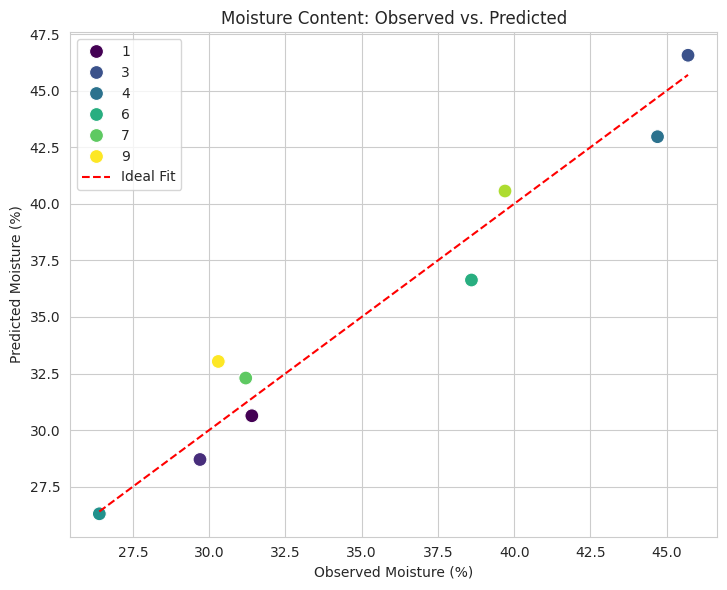

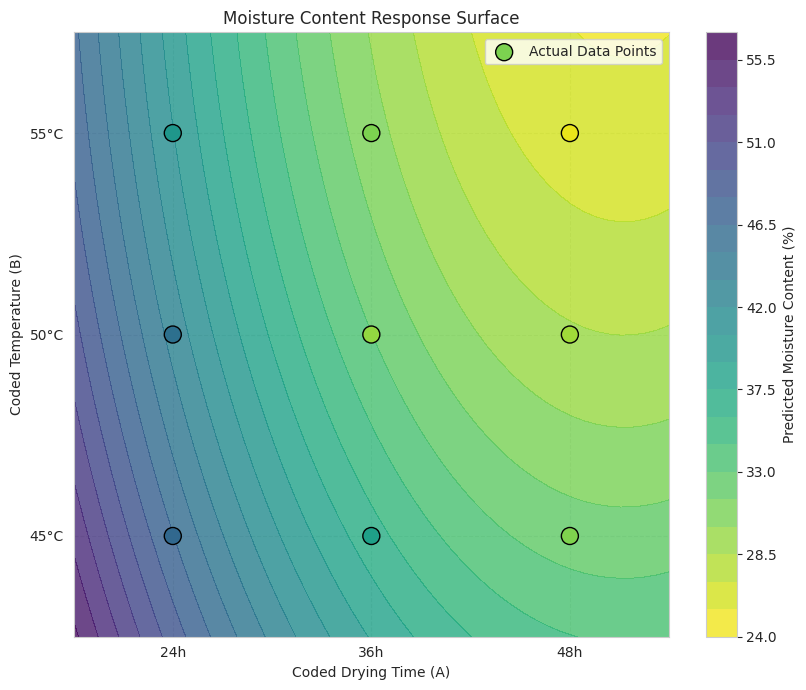

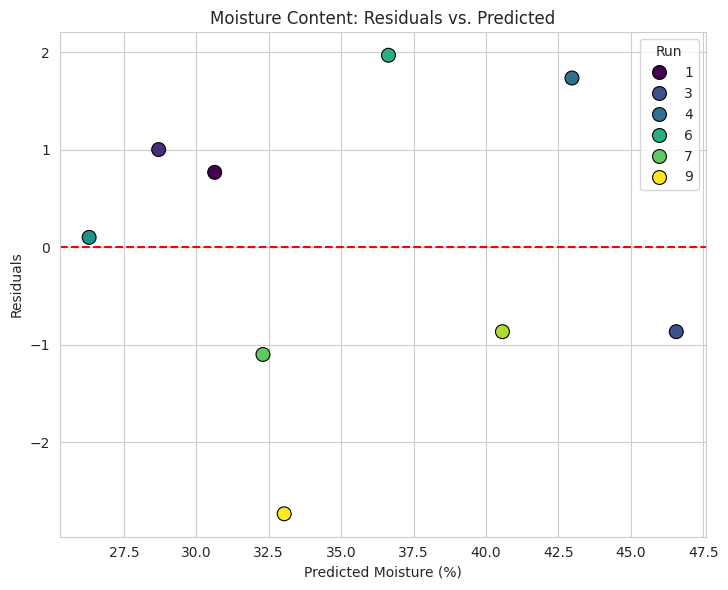

In [ ]:
print("\n--- Generating Visualizations ---")

# Calculate predicted values for both models
df_clean['Moisture_Predicted'] = moisture_model.predict(df_clean)
# df_clean['ColorChange_Predicted'] = color_model.predict(df_clean) # color_model is not defined

plt.figure(figsize=(14, 6))

# Plot for Moisture Content
plt.subplot(1, 2, 1)
sns.scatterplot(x='Moisture', y='Moisture_Predicted', data=df_clean, s=100, hue='Run', palette='viridis')
plt.plot([df_clean['Moisture'].min(), df_clean['Moisture'].max()], [df_clean['Moisture'].min(), df_clean['Moisture'].max()],
         color='red', linestyle='--', label='Ideal Fit')
plt.title('Moisture Content: Observed vs. Predicted')
plt.xlabel('Observed Moisture (%)')
plt.ylabel('Predicted Moisture (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Plot for Color Change (currently commented out as color_model is undefined)
# plt.subplot(1, 2, 2)
# sns.scatterplot(x='ColorChange', y='ColorChange_Predicted', data=df_clean, s=100, hue='Run', palette='viridis')
# plt.plot([df_clean['ColorChange'].min(), df_clean['ColorChange'].max()], [df_clean['ColorChange'].min(), df_clean['ColorChange'].max()],
#          color='red', linestyle='--', label='Ideal Fit')
# plt.title('Color Change: Observed vs. Predicted')
# plt.xlabel('Observed Color Change')
# plt.ylabel('Predicted Color Change')
# plt.legend()
# plt.grid(True)
# plt.tight_layout()

plt.show()

# --- Generating Contour Plots (Response Surfaces) ---

# Create a meshgrid for the coded values of Time (A) and Temp (B)
# Range from -1.5 to 1.5 to cover and slightly extend beyond the experimental range [-1, 1]
a_range = np.linspace(-1.5, 1.5, 50)
b_range = np.linspace(-1.5, 1.5, 50)
A, B = np.meshgrid(a_range, b_range)

# Create a DataFrame for predictions
predict_df = pd.DataFrame({'Coded_Drying_Time': A.ravel(), 'Coded_Temp': B.ravel()}) # Using correct column names

# Predict Moisture and ColorChange for the meshgrid
Z_moisture = moisture_model.predict(predict_df).values.reshape(A.shape)
# Z_color = color_model.predict(predict_df).values.reshape(A.shape) # color_model is not defined

plt.figure(figsize=(16, 7))

# Contour Plot for Moisture Content
plt.subplot(1, 2, 1)
contour_moisture = plt.contourf(A, B, Z_moisture, levels=20, cmap='viridis_r', alpha=0.8) # viridis_r for decreasing values
plt.colorbar(contour_moisture, label='Predicted Moisture Content (%)')
plt.scatter(df_clean['Coded_Drying_Time'], df_clean['Coded_Temp'], c=df_clean['Moisture'], cmap='viridis_r',
            edgecolor='k', s=150, label='Actual Data Points', vmin=Z_moisture.min(), vmax=Z_moisture.max()) # Overlay actual data points
plt.title('Moisture Content Response Surface')
plt.xlabel('Coded Drying Time (A)')
plt.ylabel('Coded Temperature (B)')
plt.xticks([-1, 0, 1], ['24h', '36h', '48h'])
plt.yticks([-1, 0, 1], ['45°C', '50°C', '55°C'])
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()

# Contour Plot for Color Change (currently commented out as color_model is undefined)
# plt.subplot(1, 2, 2)
# contour_color = plt.contourf(A, B, Z_color, levels=20, cmap='plasma', alpha=0.8)
# plt.colorbar(contour_color, label='Predicted Color Change')
# plt.scatter(df_clean['Coded_Drying_Time'], df_clean['Coded_Temp'], c=df_clean['ColorChange'], cmap='plasma',
#             edgecolor='k', s=150, label='Actual Data Points', vmin=Z_color.min(), vmax=Z_color.max()) # Overlay actual data points
# plt.title('Color Change Response Surface')
# plt.xlabel('Coded Drying Time (A)')
# plt.ylabel('Coded Temperature (B)')
# plt.xticks([-1, 0, 1], ['24h', '36h', '48h'])
# plt.yticks([-1, 0, 1], ['45°C', '50°C', '55°C'])
# plt.grid(True, linestyle='--', alpha=0.6)
# plt.legend()
# plt.tight_layout()

plt.show()

# --- Residual Plots (Optional) ---

plt.figure(figsize=(14, 6))

# Residual Plot for Moisture
plt.subplot(1, 2, 1)
sns.scatterplot(x=df_clean['Moisture_Predicted'], y=moisture_model.resid, hue=df_clean['Run'], palette='viridis', s=100, edgecolor='k')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Moisture Content: Residuals vs. Predicted')
plt.xlabel('Predicted Moisture (%)')
plt.ylabel('Residuals')
plt.grid(True)
plt.tight_layout()

# Residual Plot for Color Change (currently commented out as color_model is undefined)
# plt.subplot(1, 2, 2)
# sns.scatterplot(x=df_clean['ColorChange_Predicted'], y=color_model.resid, hue=df_clean['Run'], palette='viridis', s=100, edgecolor='k')
# plt.axhline(y=0, color='red', linestyle='--')
# plt.title('Color Change: Residuals vs. Predicted')
# plt.xlabel('Predicted Color Change')
# plt.ylabel('Residuals')
# plt.grid(True)
# plt.tight_layout()

plt.show()